Informática - 1º de Física
<br>
**Computación Científica**
<br>
<p style="color:#808080"> <small><small>
29/10/2018
</small></small></p>

## Magnitudes Físicas

### Incertidumbre

El módulo [uncertainties](http://pythonhosted.org/uncertainties/) automatiza la propagación de errores:

In [1]:
from uncertainties import ufloat

In [2]:
x = ufloat(1.345387, 0.004)

In [3]:
x

1.345387+/-0.004

In [4]:
5*x**2 + 1

10.050330898845+/-0.053815480000000006

Definimos funciones para mostrar 2 cifras significativas en la incertidumbre, siguiendo las recomendaciones establecidas.

In [5]:
def pretty(x):
    print('{:.2uS}'.format(x))
    
def prettyl(x):
    print('{:.2uP}'.format(x))

In [6]:
prettyl( x )

1.3454±0.0040


In [7]:
pretty( x )

1.3454(40)


In [8]:
pretty( 5*x**2 +1 )

10.050(54)


Este módulo tiene en cuenta la covarianza entre variables para manejar correctamente sus posibles dependencias. En el siguiente ejemplo `y` y `z` son aparentemente iguales, en magnitud e incertidumbre, pero se comportan de forma distinta al operar con `x`. Aquí `y` es independiente de `x`, mientras que `z` es una fracción de la misma magnitud `x`.

In [9]:
x = ufloat(2, 0.02)
y = ufloat(1, 0.01)
z = x/2

prettyl(x)
prettyl(y)
prettyl(z)
prettyl( x + y )
prettyl( x - y )
prettyl( x + z )
prettyl( x - z )

2.000±0.020
1.000±0.010
1.000±0.010
3.000±0.022
1.000±0.022
3.000±0.030
1.000±0.010


La incertidumbre se puede introducir de forma más bonita con la siguiente función auxiliar:

In [10]:
# Python admite símbolos unicode

# Ctrl-May-U + 025b
def ɛ(v):
    return v*ufloat(0,1)

Sirve para "añadir" un error o incertidumbre absoluta a una magnitud.

In [11]:
x = 1.345387 + ɛ(0.004)

pretty( x )

1.3454(40)


In [12]:
pretty( x**2 )

1.810(11)


Cada magnitud debe tener su propio ɛ para que los errores sean independientes.

Es más práctico usar la siguiente función, que crea cómodamente valores con un error relativo expresado en %.

In [13]:
def mag(v,ep):
    return v * (1 + ɛ(ep/100))

In [14]:
mag(25,3)

25.0+/-0.75

In [15]:
# otro símbolo útil

import numpy as np

# 03c0
π = np.pi

In [16]:
r = mag(5 , 2)

pretty( π * r**2 )

78.5(3.1)


Un pequeño inconveniente es que las funciones matemáticas hay que importarlas del módulo `uncertainties`.

In [17]:
from uncertainties.umath import sqrt

pretty( sqrt (1.345387 + ɛ(0.004)) )

1.1599(17)


Por suerte los operadores funcionan automáticamente.

In [18]:
pretty( (1.345387 + ɛ(0.004))**(1/2) )

1.1599(17)


### Unidades físicas

Hay [varios paquetes](https://socialcompare.com/en/comparison/python-units-quantities-packages-383avix4) para manejar magnitudes físicas, una posibilidad es [pint](http://pint.readthedocs.io/en/0.8/tutorial.html).

In [19]:
from pint import UnitRegistry
u = UnitRegistry()

In [20]:
(3*u.meter / (2*u.millisecond)).to(u.kilometer/u.hour)

<Quantity(5400.0, 'kilometer / hour')>

Podemos combinar de forma natural las unidades físicas y la incertidumbre:

In [21]:
2*u.kilogram + ɛ(3*u.gram)

<Quantity(2.0000+/-0.0030, 'kilogram')>

In [22]:
mag( 2*u.meter/u.sec , 5)

<Quantity(2.00+/-0.10, 'meter / second')>

Como ejemplo, definimos una función normal y corriente de Python para calcular la energía cinética de un cuerpo.

In [23]:
def kin(m,v):
    return 1/2*m*v**2

In [24]:
kin(2,3)

9.0

Y la evaluamos con magnitudes con unidades físicas e incertidumbre.

In [25]:
m = 2*u.kilogram + ɛ(3*u.gram)

v = mag( 3*u.kilometer/u.hour , 5 )

Ec = kin(m, v)

pretty(Ec)

9.00(90) kilogram * kilometer ** 2 / hour ** 2


El resultado se puede expresar en cualquier otra unidad:

In [26]:
pretty(Ec.to(u.joule))

0.694(69) joule


In [27]:
pretty(Ec.to(u.calorie))

0.166(17) calorie


In [28]:
pretty(Ec.to(u.kilowatt*u.hour))

1.93(19)e-07 hour * kilowatt


In [29]:
pretty(Ec.to(u.electron_volt))

4.33(43)e+18 electron_volt


### Caso de estudio: péndulo de [Kater](https://en.wikipedia.org/wiki/Kater%27s_pendulum)

$$g = \frac{8\pi^2}{\frac{T_1^2+T_2^2}{H}+\frac{T_1^2-T_2^2}{h_1 -h_2}}$$

In [30]:
def estimag(T1,T2,H,h1):
    h2 = H-h1
    return 8*π**2/((T1**2+T2**2)/H + (T1**2-T2**2)/(h1-h2))

In [31]:
estimag(2*u.sec, 2.003*u.sec, 1*u.meter, 0.7*u.meter)

<Quantity(9.89187781872531, 'meter / second ** 2')>

In [32]:
g = estimag(2*u.sec + ɛ(20/400*u.centisec), 2.003*u.sec, 1*u.meter, 0.7*u.meter)
pretty(g)

9.8919(87) meter / second ** 2


In [33]:
g = estimag(2    *u.sec + ɛ(20/400*u.centisec),
            2.003*u.sec + ɛ(20/400*u.centisec),
            1*u.meter,
            0.7*u.meter + ɛ(0*u.millimeter) )
pretty(g)

9.8919(94) meter / second ** 2


In [34]:
g = estimag(2    *u.sec + ɛ(20/400*u.centisec),
            2.003*u.sec + ɛ(20/400*u.centisec),
            1*u.meter,
            0.7*u.meter + ɛ(10*u.millimeter) )
pretty(g)

9.8919(96) meter / second ** 2


### Constantes físicas

Están disponibles en el módulo [scipy.constants](https://docs.scipy.org/doc/scipy-0.19.0/reference/constants.html).

In [35]:
import scipy.constants as const

In [36]:
const.Planck

6.62607004e-34

In [37]:
const.physical_constants['deuteron mass']

(3.343583719e-27, 'kg', 4.1e-35)

Podemos convertirlas al formato anterior, con incertidumbre y unidades:

In [38]:
def konst(name):
    v,unit,i = const.physical_constants[name]
    return ufloat(v,i) * u.parse_expression(unit)

In [39]:
pretty(konst('electron mass'))

9.10938356(11)e-31 kilogram


In [40]:
pretty(konst('Boltzmann constant'))

1.38064852(79)e-23 joule / kelvin


In [41]:
const.epsilon_0

8.854187817620389e-12

In [42]:
pretty(konst('electric constant'))

8.854187817620389(0)e-12 farad / meter


In [43]:
const.find('avog')

['Avogadro constant']

In [44]:
pretty(konst(_[0]))

6.022140857(74)e+23 / mole


In [45]:
const.find('lig')

['speed of light in vacuum']

In [46]:
pretty(konst(_[0]).to(u.cm / u.nanosec))

29.9792458(0) centimeter / nanosecond


### Caso de estudio: fuerza eléctrica en átomo de H.

$$F = \frac{1}{4\pi\epsilon_0}\frac{q Q}{r^2}$$

In [47]:
r = konst('Bohr radius')
pretty(r.to(u.angstrom))

e = konst('elementary charge')
pretty(e)

eps_0 = konst('electric constant')
pretty(eps_0)

F = 1/4/π/eps_0 * e * e / r**2

pretty(F)
pretty(F.to(u.newton))

0.52917721067(12) angstrom
1.6021766208(98)e-19 coulomb
8.854187817620389(0)e-12 farad / meter
8.23872337(10)e-08 coulomb ** 2 / farad / meter
8.23872337(10)e-08 newton


Velocidad clásica en la órbita:

$$ F = \frac{m v^2}{r} $$ 

$$ v = \sqrt{\frac{r F}{m}} $$

In [48]:
me = konst('electron mass')

v = (r*F/me)**(1/2)
pretty(v.to(u.km/u.hour))
pretty(v.to_base_units())

c = konst('speed of light in vacuum')
pretty((v/c).to_base_units())

7875688.545(68) kilometer / hour
2187691.262(19) meter / second
0.007297352565(63) dimensionless


In [49]:
v.error_components()

{9.10938356e-31+/-1.1e-38: 0.013208689550151281,
 1.6021766208e-19+/-9.8e-28: 0.013381405079895495,
 8.854187817620389e-12+/-0: 0,
 5.2917721067e-11+/-1.2e-20: 0.0002480482399904951}

$$ v = \sqrt{\frac{r \frac{1}{4\pi\epsilon_0}\frac{q Q}{r^2}}{m}} = \sqrt{\frac{q Q}{4\pi\epsilon_0 m r}} $$

In [50]:
v = (e * e / 4/π/eps_0 / me/ r)**(1/2)
pretty((v/c).to_base_units())

0.007297352565(63) dimensionless


In [51]:
v.error_components()

{9.10938356e-31+/-1.1e-38: 0.013208689550151281,
 1.6021766208e-19+/-9.8e-28: 0.013381405079895495,
 8.854187817620389e-12+/-0: 0,
 5.2917721067e-11+/-1.2e-20: 0.00024804823999049504}

In [52]:
eqm = abs(konst('electron charge to mass quotient'))

pretty(eqm)
pretty(e / me)

1.758820024(11)e+11 coulomb / kilogram
1.758820024(24)e+11 coulomb / kilogram


In [53]:
v = (eqm * e / 4/π/eps_0 / r)**(1/2)
pretty((v/c).to_base_units())

0.007297352566(32) dimensionless


### Caso de estudio: comparación con Monte-Carlo.

In [54]:
er_F = 0.05; er_M = 0.03; er_m = 0.01; er_d = .05
mu_F = 1e-8;
mu_M = 3;
mu_m = 0.05;
mu_d = 0.032;

F = mag(mu_F,100*er_F)
M = mag(mu_M,100*er_M)
m = mag(mu_m,100*er_m)
d = mag(mu_d,100*er_d)

In [55]:
pretty(F)
pretty(M)
pretty(m)
pretty(d)

1.000(50)e-08
3.000(90)
0.05000(50)
0.0320(16)


In [56]:
G = d**2 * F / ( M * m )

pretty(G)
prettyl(G)

6.83(79)e-11
(6.83±0.79)×10⁻¹¹


Consistente con Monte-Carlo:

In [57]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

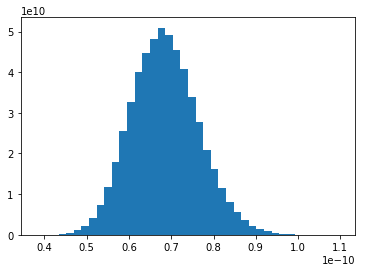

In [58]:
sigma_F = er_F * mu_F
sigma_M = er_M * mu_M
sigma_m = er_m * mu_m
sigma_d = er_d * mu_d

N = 100000
F = mu_F + sigma_F * np.random.randn( N )
M = mu_M + sigma_M * np.random.randn( N )
m = mu_m + sigma_m * np.random.randn( N )
d = mu_d + sigma_d * np.random.randn( N )

G = d**2 * F / ( M * m )

plt.hist( G, 40, density = 1 );

In [59]:
np.mean(G)

6.851940736879683e-11

In [60]:
np.std(G)

7.95144571724547e-12